## Final Project Submission

Please fill out:
* Student name: Rashawn Wilkinson
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Road To The Emmy
Today, we will be making data-driven inferences about movies to achieve box office success. We have received several datasets to analyze and make calculated assumptions. With this data, we will devise and answer meaningful questions that boost our chances of not only receiving a sufficient ROI, but to bring in profit well-worth every penny put into our film's production. 

## Importing our packages
The first order of business is to import all necessary packages that may be used to answer our questions. We will be using powerful tools for calculating integers, strings, and several other data types that may arise. We will also be setting up charts and graphs that will visually represent trends in our dataset(s).

In [1]:
from glob import glob


In [2]:
import os


In [3]:
import pandas as pd


In [4]:
import numpy as np


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [6]:
import statistics as stat


In [7]:
import seaborn as sns


C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
import sqlite3 as sql

## Importing our data
Once packages are imported, movie data in regards to gross sales, title ratings, and other bits of information are then imported. 
<img src="https://rolfje.files.wordpress.com/2015/01/61c1ee2ce9d31c894d188b7b17cacee90ffdece8bc4c4798d10100b7515820de.jpg" alt="Loading..." title="Blessed By Code" />

To unpack all the zips we have available, we will be using the method 'glob'.

In [9]:
csv_files = glob("./zippedData/*.csv.gz")

Now, we are going to separate our csv files to access each of our individual datasets easily.

In [10]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

Let's double check to see if we have successfully extracted all datasets.

In [11]:

csv_files_dict.keys()




dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [12]:
mov_gross = csv_files_dict['bom_movie_gross_gz']
imdb_credit_names = csv_files_dict['imdb_name_basics_gz']
imdb_title_akas = csv_files_dict['imdb_title_basics_gz']
imdb_title_crew = csv_files_dict['imdb_title_crew_gz']
imdb_title_principals = csv_files_dict['imdb_title_principals_gz']
imdb_title_rate = csv_files_dict['imdb_title_ratings_gz']
tmdb_mov = csv_files_dict['tmdb_movies_gz']
tn_mov_budgets = csv_files_dict['tn_movie_budgets_gz']


Without access to the glob package, we are still able to import our data with pandas. Assuming pandas is imported as pd, it would look something like this:

In [13]:
#gross_df = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#title_rate_df = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#mov_df = pd.read_csv('tmdb.movies.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#mov_info = pd.read_csv('rt.movie_info.tsv.gz', compression='gzip', sep='\t', engine='python', index_col=0)
#mov_budget_df = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', sep='\t', engine='python', index_col=0)


<img src="http://www.quickmeme.com/img/14/1490ff023ac62f215a12a2b022b4cb6da9e2935688b22cc6b4ad75788ad98816.jpg" alt="Loading..." title="Blessed By Code" />


Now that the appropriate packages are imported and our datasets are prepared for analysis, we can go on to asking questions that can be useful to stakeholders. 

### Question 1 
What are the top 10 highest grossing film worldwide?

First we will check and see if our list of worldwide_gross entries match the amount of data entries in other columns.

In [14]:
tn_mov_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [15]:
print('There are', tn_mov_budgets['worldwide_gross'].isna().sum()
, 'missing values in the worldwide list')

There are 0 missing values in the worldwide list


Next, let's remove "$" and commas to set our values to integers.

In [16]:
#Worldwide
tn_mov_budgets['worldwide_gross'] = tn_mov_budgets['worldwide_gross'].str.replace('$', '')
tn_mov_budgets['worldwide_gross'] = tn_mov_budgets['worldwide_gross'].str.replace(',', '')
tn_mov_budgets['worldwide_gross'] = tn_mov_budgets['worldwide_gross'].astype(np.int64)

As we can see, our worldwide_gross values are now  integers.

In [17]:
tn_mov_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


In [18]:
tn_mov_budgets = tn_mov_budgets.sort_values(by='worldwide_gross', ascending=False)

In descending order, we have our top grossing films worldwide.

In [19]:
top_10_gross = tn_mov_budgets.head(11)
top_10_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200
34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864
67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794
27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963
42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224


Our new dataframe, top_10_gross, will come in handy later on in the project.

We're in good shape. Now, let's get a graph to visualize the highest grossing films worldwide.

#### Question 1: Visualization

As we can see, Avatar is the highest grossing film worldwide.

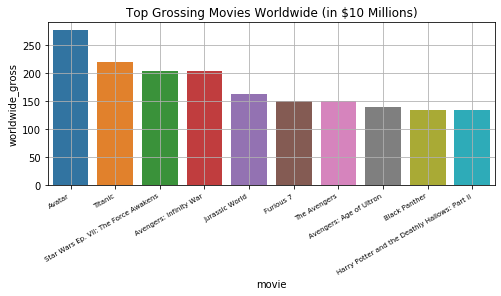

In [20]:
#reduce fig size, make titles bigger. make horizontal 

plt.figure(figsize=(8, 3))

plt.title('Top Grossing Movies Worldwide (in $10 Millions)')
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
sns.barplot(tn_mov_budgets['movie'][0:10], tn_mov_budgets['worldwide_gross'][0:10]//10000000)
plt.grid()
plt.show()


We now have a list of the highest grossing films worldwide.
Knowing this vital information allows us to research what made this movie such a success at the box office.
This leads us to our next question.

### Question 2

What are the top 10 most popular films of the last decade? 

In our dataset tmdb_mov, we will sort our columns by popularity. With some code, we can do just that. 

In [21]:
df_tmdb_mov = pd.DataFrame(tmdb_mov)
df_tmdb_mov['release_date'] = df_tmdb_mov['release_date'].str.replace('-','')

df_tmdb_mov.sort_values(by = 'popularity', ascending=False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,20180427,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,20141024,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,20181214,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,20141217,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,20120504,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...
13877,[10749],401741,en,Crème Caramel,0.600,20140520,Crème Caramel,5.0,1
13878,[878],401427,en,Elegy,0.600,20140910,Elegy,5.0,1
13879,[35],399054,en,Jaguar,0.600,20140921,Jaguar,5.0,1
13880,[],381154,en,Unleashed! A Dog Dancing Story,0.600,20140213,Unleashed! A Dog Dancing Story,5.0,1


Let's look through the top 20 most popular movies, create a new DataFrame, and remove all movies released before the year 2010 from the new dataframe. 

In [22]:
df_tmdb_mov.head(21)  

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,20101119,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,20100326,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,20100507,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,19951122,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,20100716,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,20100211,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,20091218,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,20100617,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,20100709,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,20101104,Megamind,6.8,3635


In [23]:
df_mov_release= df_tmdb_mov.drop([3,6,10])
top_10_pop_mov = df_mov_release.head(10)

In [24]:
print('The top 10 most popular movies of the decade are the following:           ',  
      list(top_10_pop_mov['original_title']))

The top 10 most popular movies of the decade are the following:            ['Harry Potter and the Deathly Hallows: Part 1', 'How to Train Your Dragon', 'Iron Man 2', 'Inception', 'Percy Jackson & the Olympians: The Lightning Thief', 'Toy Story 3', 'Despicable Me', 'Megamind', 'Alice in Wonderland', 'The Expendables']


In [25]:
top_10_pop_mov

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,20101119,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,20100326,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,20100507,Iron Man 2,6.8,12368
4,"[28, 878, 12]",27205,en,Inception,27.920,20100716,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,20100211,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,20100617,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,20100709,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,20101104,Megamind,6.8,3635
11,"[10751, 14, 12]",12155,en,Alice in Wonderland,22.020,20100305,Alice in Wonderland,6.6,8713
12,"[53, 12, 28]",27578,en,The Expendables,21.517,20100803,The Expendables,6.1,4647


#### Question 2: Visualization

*****

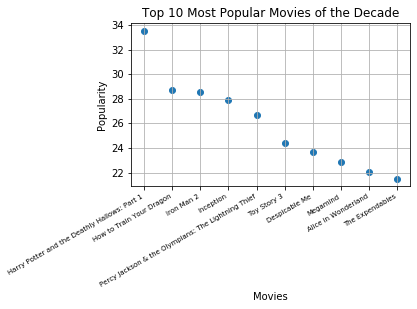

In [26]:
plt.figure(figsize=(5, 3))

#sns.barplot(x=tn_mov_budgets['movie'][0:5], y=tn_mov_budgets['worldwide_gross'][0:5])
plt.title('Top 10 Most Popular Movies of the Decade')
plt.xlabel('Movies')
plt.ylabel('Popularity')
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.scatter(top_10_pop_mov['original_title'], top_10_pop_mov['popularity'],label='Pop')
plt.grid(True)
plt.show()


## Question 3

Is there a correlation between the top 10 highest grossing films worldwide and the top 10 most popular movies of the decade?

We will be searching for a correlation between our datasets
df_tmdb_mov and tn_mov_budgets.

In [27]:
#We will turn our desired sets of data into a dataframe called joined_df.  
df_tn_mov_budgets = pd.DataFrame(tn_mov_budgets)
df_tmdb_mov
big_data = pd.concat([df_tmdb_mov,df_tn_mov_budgets])

In [28]:
joined_df = df_tmdb_mov.join(df_tn_mov_budgets['worldwide_gross'])
joined_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,worldwide_gross
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,20101119,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,20100326,How to Train Your Dragon,7.7,7610,2.776345e+09
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,20100326,How to Train Your Dragon,7.7,7610,7.314634e+08
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,20100326,How to Train Your Dragon,7.7,7610,3.169153e+08
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,20100326,How to Train Your Dragon,7.7,7610,3.117445e+08
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,20181013,Laboratory Conditions,0.0,1,NaN
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,20180501,_EXHIBIT_84xxx_,0.0,1,NaN
26514,"[14, 28, 12]",381231,en,The Last One,0.600,20181001,The Last One,0.0,1,NaN
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,20180622,Trailer Made,0.0,1,NaN


Using the method .corr on our dataset joined_df, we can see if the different columns have any relation to each other.


In [29]:
joined_df.corr()

,id,popularity,vote_average,vote_count,worldwide_gross
id,1.000000,-0.507954,0.008808,-0.372612,-0.012067
popularity,-0.507954,1.000000,0.154446,0.731059,0.004908
vote_average,0.008808,0.154446,1.000000,0.169717,0.001903
vote_count,-0.372612,0.731059,0.169717,1.000000,0.001689
worldwide_gross,-0.012067,0.004908,0.001903,0.001689,1.000000


As we can see, there is very little to no correlation between the top 10 highest grossing films worldwide and the top 10 most popular movies of the decade however we do see another correlation.

vote_count and popularity have a high correlation at about 0.73.

In [ ]:
joined_df_sample = joined_df.head(50)
sns.pairplot(joined_df_sample)
plt.show()

With this information it is safe to say that a high grossing film will not necessarily be the most popular film. On the other hand, a high vote count will positively reflect a film's popularity. Our firm must decide if the primary goal of the film is to gain exposure or to generate maximum gross. If the goal is to gain exposure, focus on the df_tmdb_mov dataframe will be advantageous. If the focus is on gross primarily, utilization of the df_tn_mov_budgets dataframe will prove to be useful.   
